이번 과제는 **KNN 알고리즘**과 **K-Means 알고리즘**을 활용하여 데이터를 분석하는 것입니다.

이번 과제는 두 가지 파트로 나누어져 있습니다:

#### 1. KNN 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- KNN 알고리즘을 구현하고, 하이퍼파라미터 튜닝을 통해 최적의 성능을 내는 모델을 구축해 보세요.
  - 다양한 distance metric을 사용해보세요.
- 모델의 성능을 평가한 뒤, 다양한 지표를 사용해 결과를 해석하세요.
- 추가적으로 Weighted KNN과 같은 변형된 알고리즘도 적용해 보세요 :)

#### 2. K-Means 알고리즘 구현 및 분석
- 주어진 데이터셋을 로드한 후, 전처리와 EDA을 수행하세요.
  - [데이터 다운받기 : Facebook Live sellers](https://www.kaggle.com/datasets/ashishg21/facebook-live-sellers-in-thailand-uci-ml-repo)
- K-Means 알고리즘을 사용해 clustering을 수행하세요.
  - 다양한 cluster 개수를 가지고 실험해 보세요.
- clustering 결과를 시각화하고, Elbow Method나 Silhouette Score 등을 활용해 clustering의 성능을 평가하세요.
- 추가적으로 K-Means++를 사용해 clustering을 진행해 보세요 :)



---

In [1]:
# 본인이 필요한 라이브러리 추가

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


# 1. KNN 과제

## 1. 데이터 로드

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. 데이터 전처리/EDA


In [6]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


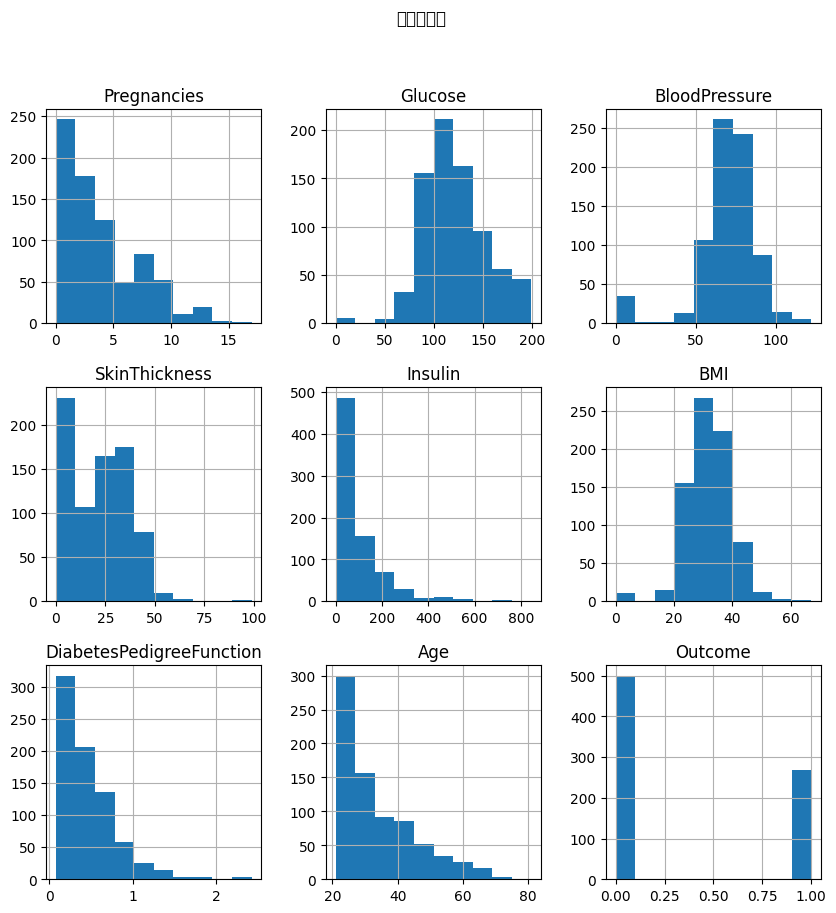

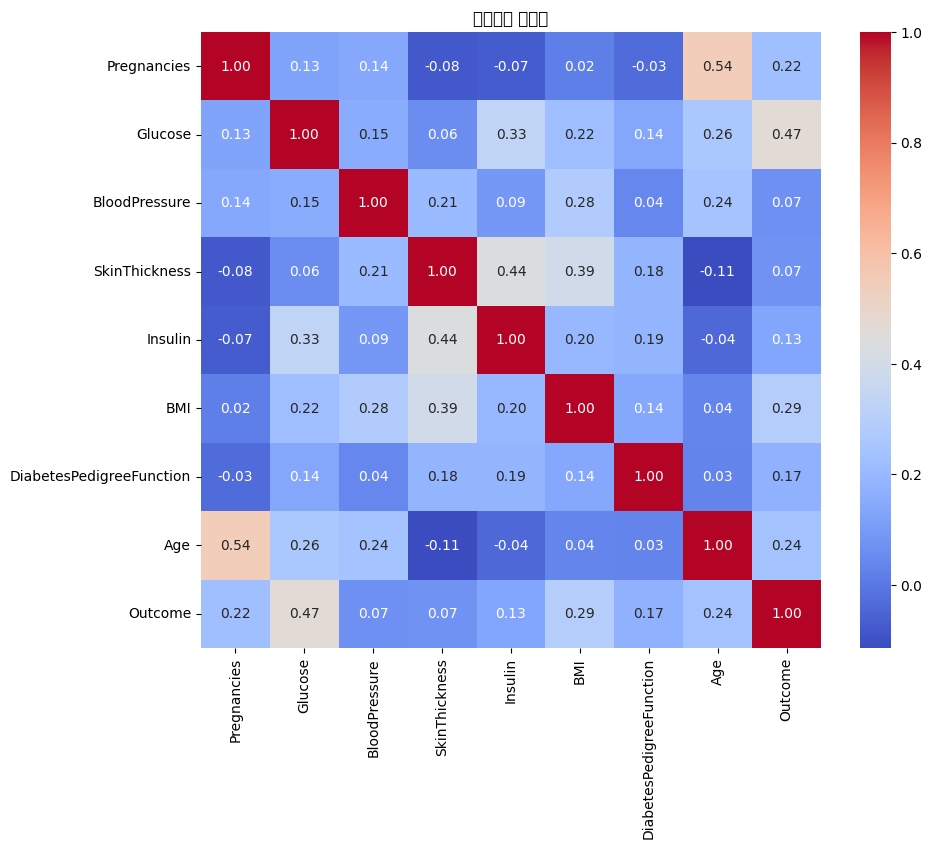

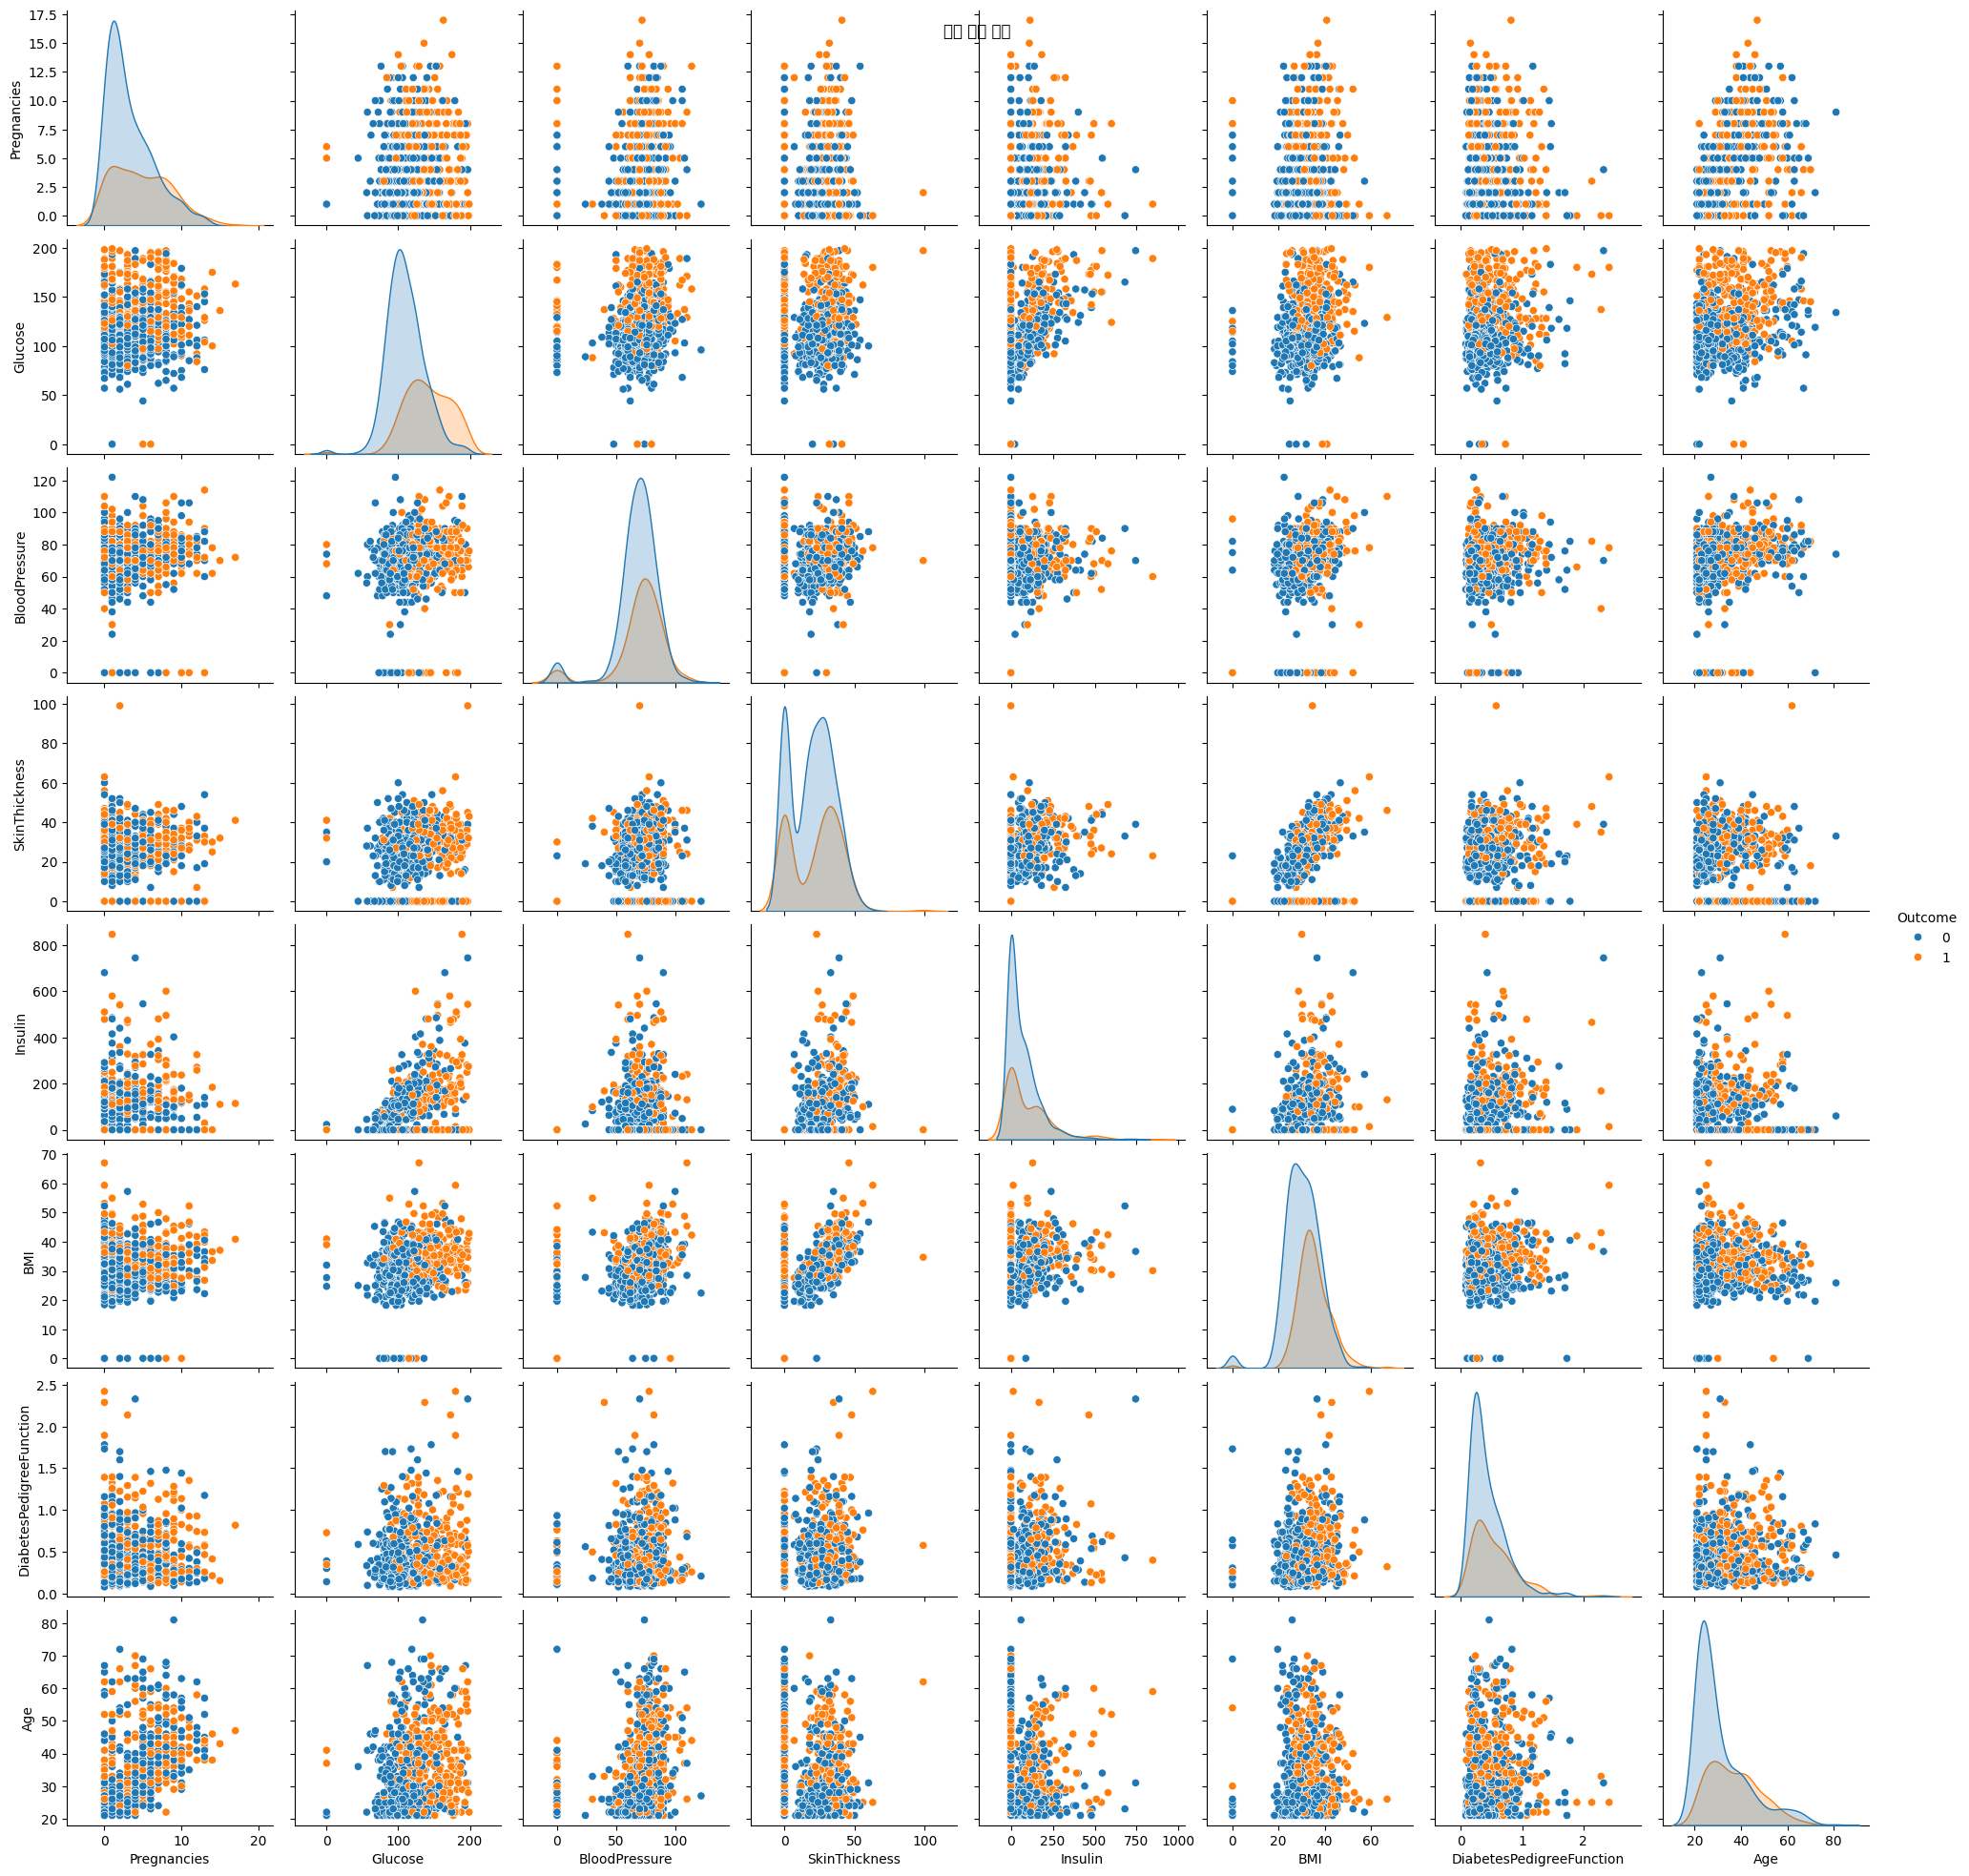

Outcome 변수의 클래스 분포:
Outcome
0    500
1    268
Name: count, dtype: int64


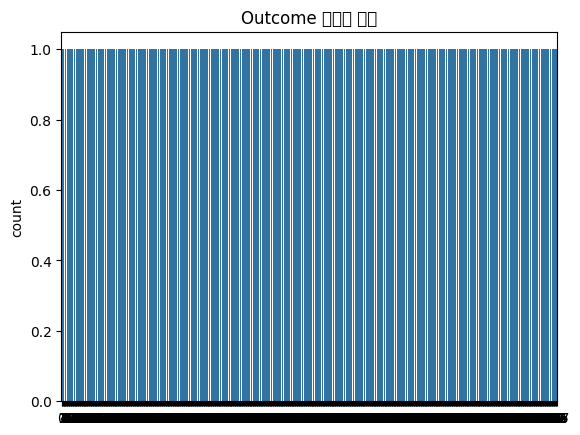

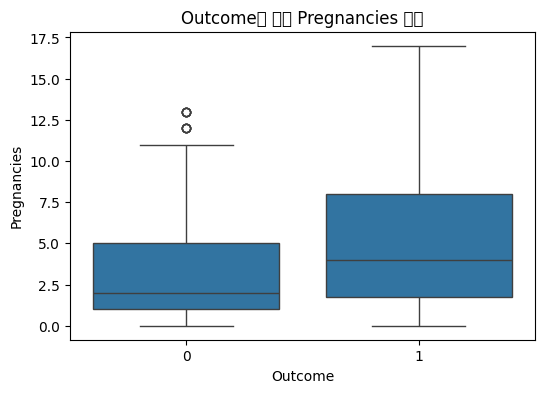

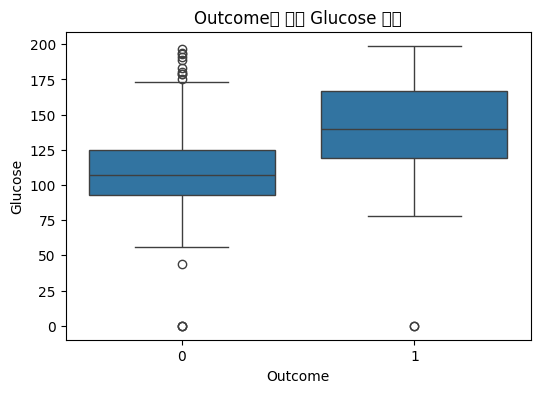

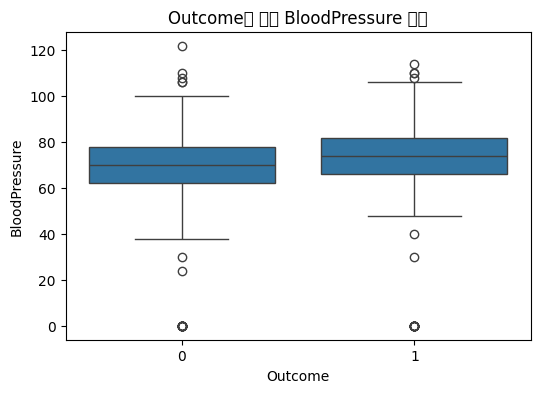

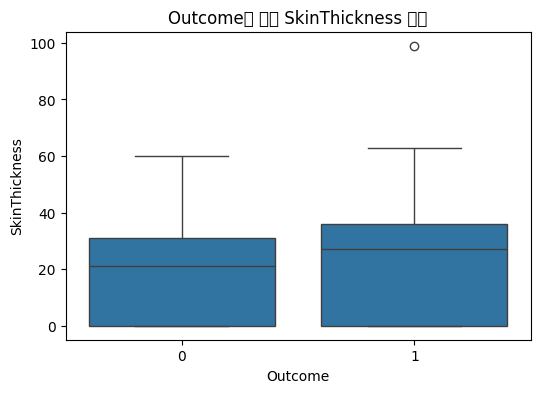

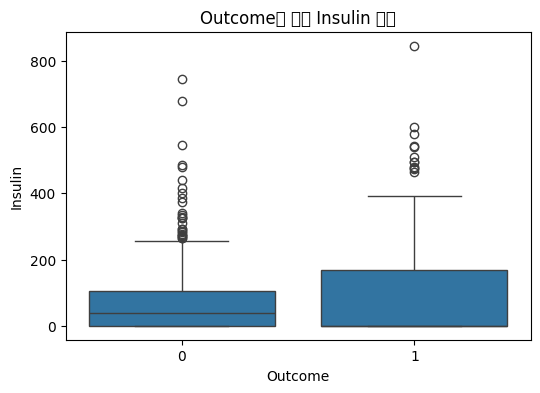

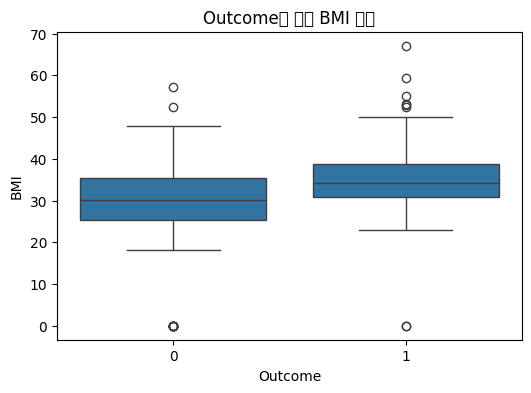

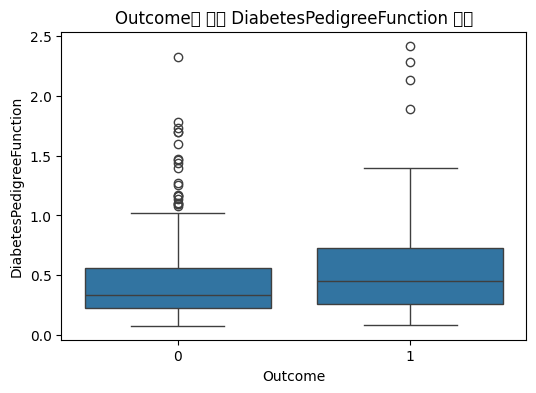

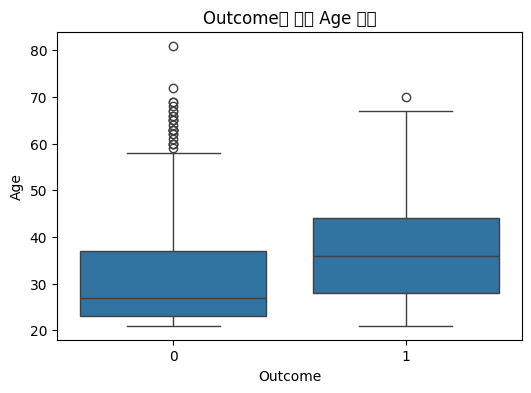

In [7]:
# 각 변수에 대한 히스토그램 그리기
df.hist(figsize=(10, 10))
plt.suptitle("히스토그램")
plt.show()

# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('상관관계 히트맵')
plt.show()

# 종속 변수(예: 'Outcome')와 다른 변수와의 관계 시각화
sns.pairplot(df, hue='Outcome')
plt.suptitle('변수 간의 관계')
plt.show()

# Outcome의 클래스 분포 확인
print("Outcome 변수의 클래스 분포:")
print(df['Outcome'].value_counts())
sns.countplot(df['Outcome'])
plt.title('Outcome 클래스 분포')
plt.show()

# 변수 간의 상자 그림(Box plot) 확인 (예: Outcome에 따른 변수 분포 차이)
for column in df.columns[:-1]:  # Outcome 제외
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Outcome에 따른 {column} 분포')
    plt.show()

## 3. KNN 구현 & 파라미터 튜닝


In [8]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 독립 변수(X)와 종속 변수(y) 분리
X = df.drop(columns=['Outcome'])  # 독립 변수들
y = df['Outcome']  # 종속 변수

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링 (KNN은 거리 기반 알고리즘이므로 스케일링 필요)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN 모델 생성 및 학습
knn = KNeighborsClassifier(n_neighbors=5)  # 기본적으로 k=5로 설정
knn.fit(X_train, y_train)

# 예측 및 평가
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6948051948051948

Confusion Matrix:
 [[79 20]
 [27 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [9]:
from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # 이웃 수
    'weights': ['uniform', 'distance'],  # 가중치 방식
    'metric': ['euclidean', 'manhattan', 'minkowski']  # 거리 계산 방식
}

# KNN 모델 및 GridSearchCV 설정
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적 파라미터 및 성능 확인
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 최적 모델로 테스트 세트 평가
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Best Cross-Validation Score: 0.7655337864854058
Test Set Accuracy: 0.6948051948051948

Confusion Matrix:
 [[77 22]
 [25 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.58      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



## 4. 평가

Test Set Accuracy: 0.6948051948051948

Confusion Matrix:
 [[77 22]
 [25 30]]


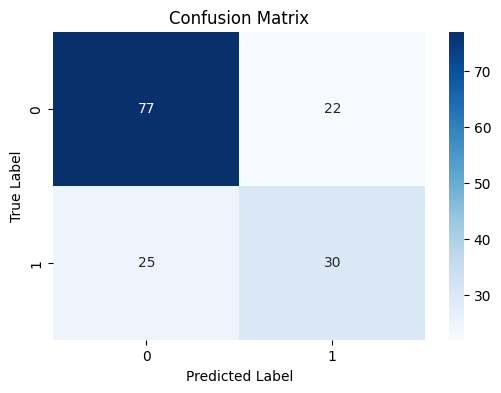


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.78      0.77        99
           1       0.58      0.55      0.56        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154

ROC AUC Score: 0.7709825528007346


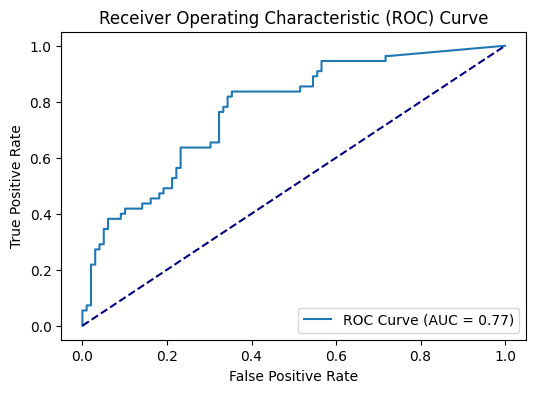

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 최적 모델로 테스트 세트 예측
y_pred = best_knn.predict(X_test)

# 정확도(Accuracy) 계산
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

# 혼동 행렬(Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# 혼동 행렬 시각화
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 분류 리포트(Classification Report) 출력
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC AUC 점수 계산
y_prob = best_knn.predict_proba(X_test)[:, 1]  # 양성 클래스의 확률
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# ROC Curve 시각화
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


---
# 2. K-Means 과제

## 1. 데이터 로드

In [11]:
# 본인 데이터 저장 경로에 맞춰 수정하기

df = pd.read_csv("/content/drive/MyDrive/Live.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


## 2. 데이터 전처리/EDA

In [12]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

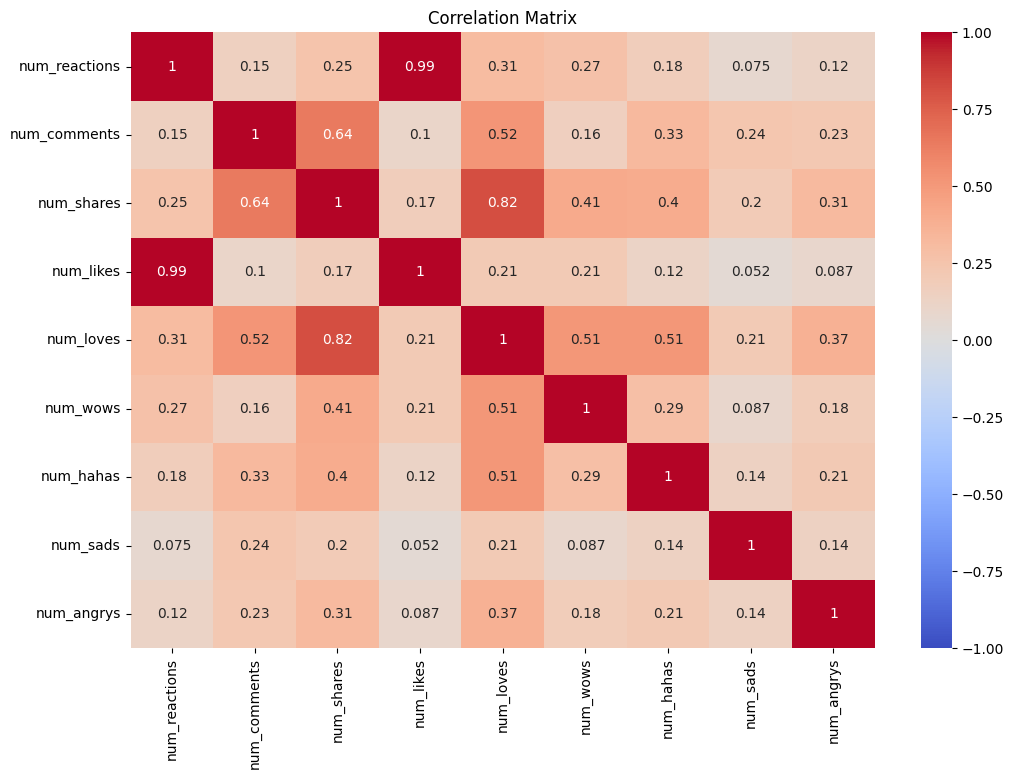

In [15]:
# 숫자 데이터만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 상관관계 매트릭스 계산
corr_matrix = numeric_df.corr()

# 결과 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## 3. K-Means 구현 & 파라미터 튜닝

In [18]:
# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

In [19]:
# K값 선택 (클러스터 수)
k = 3  # 예시로 3개의 클러스터를 선택, 이 값은 분석 및 도메인 지식에 따라 조정해야 함

# K-means 모델 생성 및 학습
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# 클러스터 라벨 얻기
labels = kmeans.labels_

# 클러스터 중심 얻기
centers = kmeans.cluster_centers_

# 결과를 원본 데이터프레임에 추가
df['Cluster'] = labels


In [21]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


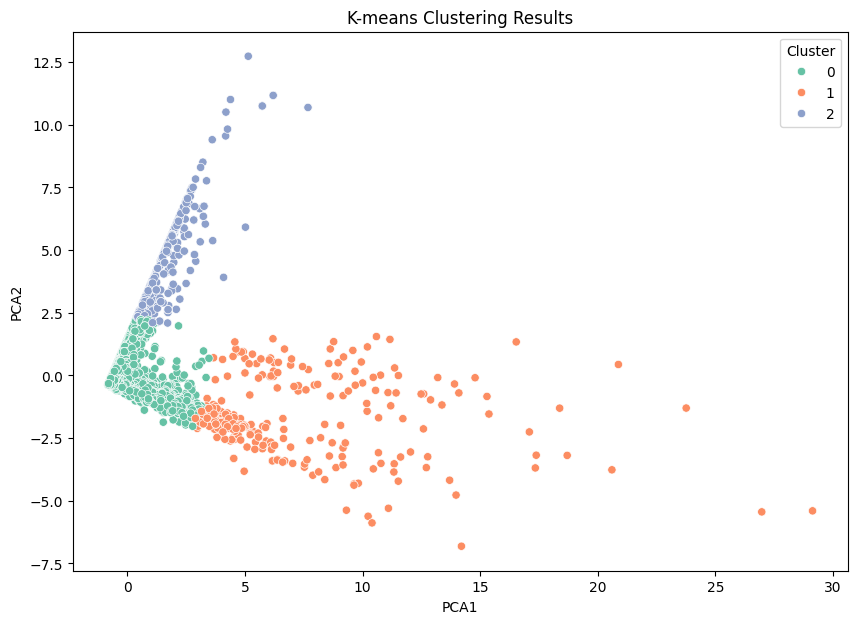

In [22]:
# PCA를 사용하여 2D로 차원 축소
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# DataFrame에 PCA 결과 추가
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = labels

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set2', marker='o')
plt.title('K-means Clustering Results')
plt.show()


## 4. 평가

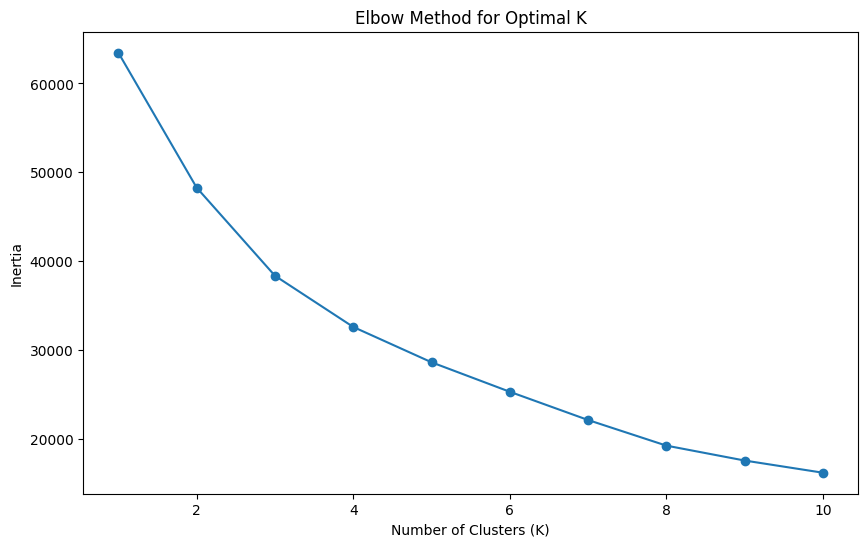

Silhouette Score for K=10: 0.75


In [23]:
# 엘보우 방법
inertia = []
k_range = range(1, 11)  # 1부터 10까지의 K값을 테스트
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# 실루엣 점수 계산 (K=3으로 예시)
silhouette_avg = silhouette_score(scaled_data, labels)
print(f'Silhouette Score for K={k}: {silhouette_avg:.2f}')
